In [12]:
#import tools as tl
import lab1.bit_array_tools as bat
import lab1.channel as channel
import lab1.generic_coder as gc
import lab2.cyclic_coder as cc
import lab3.convolutional_coder as convc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from scipy import special as sp

inverse_sqrt_of_2 = np.sqrt(2) / 2
def Q(x):
    return 0.5 * (1 - sp.erf(x * inverse_sqrt_of_2))

In [13]:
def plot_graphs(coders_dict, num_of_info_words=1000, dir_name=None, fig_name=None, debug=False):
    limit = 1e-6
    i = 0.5
    sticks = []
    while i > 0.001:
        sticks.append(i)
        i /= 2
    vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
    ini = time.time()
    print("Initiate process:")
    data_dict = dict()
    for coder_name in coders_dict:
        data_dict[coder_name] = {'p':list(), 'pb':list()}
    for p in vp:
        ini_cycle = time.time()
        for coder_name in coders_dict:
            coder = coders_dict[coder_name]['coder']
            p_vector = data_dict[coder_name]['p']
            pb  = data_dict[coder_name]['pb']
            p_vector.append(p)
            information_word_length = coder.information_word_length
            # The magic happens here:
            information_words_array = bat.generate_information_words(num_of_info_words, information_word_length)
            codewords_array = coder.encode(information_words_array)
            transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
            decoded_words = coder.decode(transmitted_words)
            if debug:
                print("###########Debug############")
                print(f"{coder_name =}\n{list(information_words_array) =}\n        {list(codewords_array) =}\n      {list(transmitted_words) =}\n          {list(decoded_words) =}")
            pb.append(bat.compare_arrays(information_words_array, decoded_words))
        print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
    print("Completed in {:.4}s".format(time.time() - ini))
    x = np.linspace(0.5, 0, 100)
    fig, ax = plt.subplots(figsize=(16,10), dpi=80)
    for coder_name, data in data_dict.items():
        color = coders_dict[coder_name].get('color')
        linewidth = coders_dict[coder_name].get('linewidth')
        linestyle = coders_dict[coder_name].get('linestyle')
        ax.plot(data['p'], data['pb'], label=coders_dict[coder_name].get('label', coder_name), color=color, linewidth=linewidth, linestyle=linestyle)
    ax.set_yscale('log', base=2)
    ax.set_xscale('log', base=2)
    ax.set_xlim(0.5, pow(10, -3))
    ax.set_ylim(pow(10, -3), 0.5)
    plt.xticks(sticks, sticks)
    plt.yticks(sticks, sticks)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

    plt.xlabel('p')
    plt.ylabel('Pb')
    ax.legend()
    if dir_name is None: dir_name = './'
    if fig_name is None: fig_name = 'code_' + str(num_of_info_words)
    plt.savefig(dir_name + fig_name, facecolor='white')
    plt.show()

In [14]:
def faster_plot_graphs(coders_dict, num_of_info_words=1000, dir_name=None, fig_name=None, debug=False):
    limit = 1e-6
    i = 0.5
    sticks = []
    while i > 0.001:
        sticks.append(i)
        i /= 2
    vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 40, base=2)
    ini = time.time()
    print("Initiate process:")
    data_dict = dict()
    for coder_name in coders_dict:
        data_dict[coder_name] = {'p':list(), 'pb':list()}
    for p in vp:
        ini_cycle = time.time()
        for coder_name in coders_dict:
            coder = coders_dict[coder_name]['coder']
            p_vector = data_dict[coder_name]['p']
            pb  = data_dict[coder_name]['pb']
            p_vector.append(p)
            information_word_length = coder.information_word_length
            # The magic happens here:
            information_words_array = np.zeros(num_of_info_words * information_word_length, dtype=np.ubyte)
            codewords_array = np.zeros(num_of_info_words * coder.codeword_length, dtype=np.ubyte) # Simulate encoding 0's
            transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
            decoded_words = coder.decode(transmitted_words)
            pb.append(bat.compare_arrays(information_words_array, decoded_words))
        print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
    print("Completed in {:.4}s".format(time.time() - ini))
    x = np.linspace(0.5, 0, 100)
    fig, ax = plt.subplots(figsize=(16,10), dpi=80)
    for coder_name, data in data_dict.items():
        color = coders_dict[coder_name].get('color')
        linewidth = coders_dict[coder_name].get('linewidth')
        linestyle = coders_dict[coder_name].get('linestyle')
        ax.plot(data['p'], data['pb'], label=coders_dict[coder_name].get('label', coder_name), color=color, linewidth=linewidth, linestyle=linestyle)
    ax.set_yscale('log', base=2)
    ax.set_xscale('log', base=2)
    ax.set_xlim(0.5, pow(10, -3))
    ax.set_ylim(pow(10, -3), 0.5)
    plt.xticks(sticks, sticks)
    plt.yticks(sticks, sticks)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

    plt.xlabel('p')
    plt.ylabel('Pb')
    ax.legend()
    if dir_name is None: dir_name = './'
    if fig_name is None: fig_name = 'code_' + str(num_of_info_words)
    plt.savefig(dir_name + fig_name, facecolor='white')
    plt.show()

In [15]:
def BPSK_p_calculator(signal_noise_ratio):
    return Q(np.sqrt(2 * signal_noise_ratio))

def plot_graphs_by_signal_noise_ratio(coders_dict, p_calculator = BPSK_p_calculator, max_bits_per_cycle = 10000, Eb_N0_range = (-20, 15), num_of_points = 100, dir_name=None, fig_name=None, debug=False):
    signal_noise_ratio_in_DB_space = np.linspace(Eb_N0_range[0], Eb_N0_range[1], num_of_points)
    ini = time.time()
    print("Initiate process:")
    data_dict = dict()
    for coder_name in coders_dict:
        data_dict[coder_name] = {'Eb/N0':signal_noise_ratio_in_DB_space, 'pb':list()}
    for signal_noise_ratio_in_DB in signal_noise_ratio_in_DB_space:
        ini_cycle = time.time()
        Eb_N0 = 10 ** (signal_noise_ratio_in_DB / 10)
        for coder_name in coders_dict:
            coder = coders_dict[coder_name]['coder']
            pb  = data_dict[coder_name]['pb']
            codeword_length         = coder.codeword_length
            information_word_length = coder.information_word_length
            Et_N0 = Eb_N0 * (information_word_length / codeword_length)
            p = p_calculator(Et_N0)
            # Estimate the number of bits to transmit:
            #if len(pb) == 0:
            #    number_of_bits_to_transmit = 10000 
            #elif pb[-1] > 0:
            #    number_of_bits_to_transmit = int((1000 / pb[-1]))
            #if number_of_bits_to_transmit > max_bits_per_cycle:
            #    number_of_bits_to_transmit = max_bits_per_cycle
            number_of_bits_to_transmit = max_bits_per_cycle
            num_of_info_words = number_of_bits_to_transmit // information_word_length + 1
            # The magic happens here:
            information_words_array = np.zeros(num_of_info_words * information_word_length, dtype=np.ubyte)
            codewords_array = np.zeros(num_of_info_words * codeword_length, dtype=np.ubyte) # Simulate encoding 0's
            transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
            decoded_words = coder.decode(transmitted_words)
            if debug:
                print("###########Debug############")
                print(f"{coder_name =}\n{list(information_words_array) =}\n        {list(codewords_array) =}\n      {list(transmitted_words) =}\n          {list(decoded_words) =}")
            pb.append(bat.compare_arrays(information_words_array, decoded_words))
        print("Eb_N0 (dB) = {:<10.2} (T:{:<5.4} s)".format(signal_noise_ratio_in_DB, time.time() - ini_cycle))
    print("Completed in {:.4}s".format(time.time() - ini))
    x = np.linspace(-45, 15, 100)
    fig, ax = plt.subplots(figsize=(20,12.5), dpi=100)
    plt.rc('font', size=20) 
    for coder_name, data in data_dict.items():
        color = coders_dict[coder_name].get('color')
        linewidth = coders_dict[coder_name].get('linewidth')
        linestyle = coders_dict[coder_name].get('linestyle')
        ax.plot(data['Eb/N0'], data['pb'], label=coders_dict[coder_name].get('label', coder_name), color=color, linewidth=linewidth, linestyle=linestyle)
    ax.set_yscale('log', base=10)
    #ax.set_xscale('log', base=2)
    ax.set_xlim(-30, 15)
    ax.set_ylim(pow(10, -7), 0.5)
    
    Ysticks = [0.5]
    i = 0.1
    while i > 0.000001:
        Ysticks.append(i)
        i /= 10
    Xsticks = list(range(Eb_N0_range[0], Eb_N0_range[1], 5))
    plt.xticks(Xsticks, Xsticks)
    plt.yticks(Ysticks, Ysticks)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

    plt.xlabel('Eb/N0')
    plt.ylabel('Pb')
    ax.legend()
    if dir_name is None: dir_name = './'
    if fig_name is None: fig_name = 'SNR_plot_' + str(max_bits_per_cycle) + 'max_bits'
    plt.savefig(dir_name + fig_name, facecolor='white')
    plt.show()

Initiate process:
Eb_N0 (dB) = -2e+01     (T:149.5 s)
Eb_N0 (dB) = -2e+01     (T:146.1 s)
Eb_N0 (dB) = -1.9e+01   (T:148.0 s)
Eb_N0 (dB) = -1.9e+01   (T:147.4 s)
Eb_N0 (dB) = -1.9e+01   (T:146.7 s)
Eb_N0 (dB) = -1.8e+01   (T:146.4 s)
Eb_N0 (dB) = -1.8e+01   (T:145.3 s)
Eb_N0 (dB) = -1.8e+01   (T:134.1 s)
Eb_N0 (dB) = -1.7e+01   (T:129.1 s)
Eb_N0 (dB) = -1.7e+01   (T:132.9 s)
Eb_N0 (dB) = -1.6e+01   (T:130.8 s)
Eb_N0 (dB) = -1.6e+01   (T:130.8 s)
Eb_N0 (dB) = -1.6e+01   (T:142.3 s)
Eb_N0 (dB) = -1.5e+01   (T:150.8 s)
Eb_N0 (dB) = -1.5e+01   (T:157.0 s)
Eb_N0 (dB) = -1.5e+01   (T:147.9 s)
Eb_N0 (dB) = -1.4e+01   (T:146.9 s)
Eb_N0 (dB) = -1.4e+01   (T:146.7 s)
Eb_N0 (dB) = -1.4e+01   (T:148.6 s)
Eb_N0 (dB) = -1.3e+01   (T:146.9 s)
Eb_N0 (dB) = -1.3e+01   (T:147.1 s)
Eb_N0 (dB) = -1.3e+01   (T:147.9 s)
Eb_N0 (dB) = -1.2e+01   (T:146.4 s)
Eb_N0 (dB) = -1.2e+01   (T:135.5 s)
Eb_N0 (dB) = -1.2e+01   (T:130.6 s)
Eb_N0 (dB) = -1.1e+01   (T:130.1 s)
Eb_N0 (dB) = -1.1e+01   (T:131.2 s)
Eb_N0 (dB)

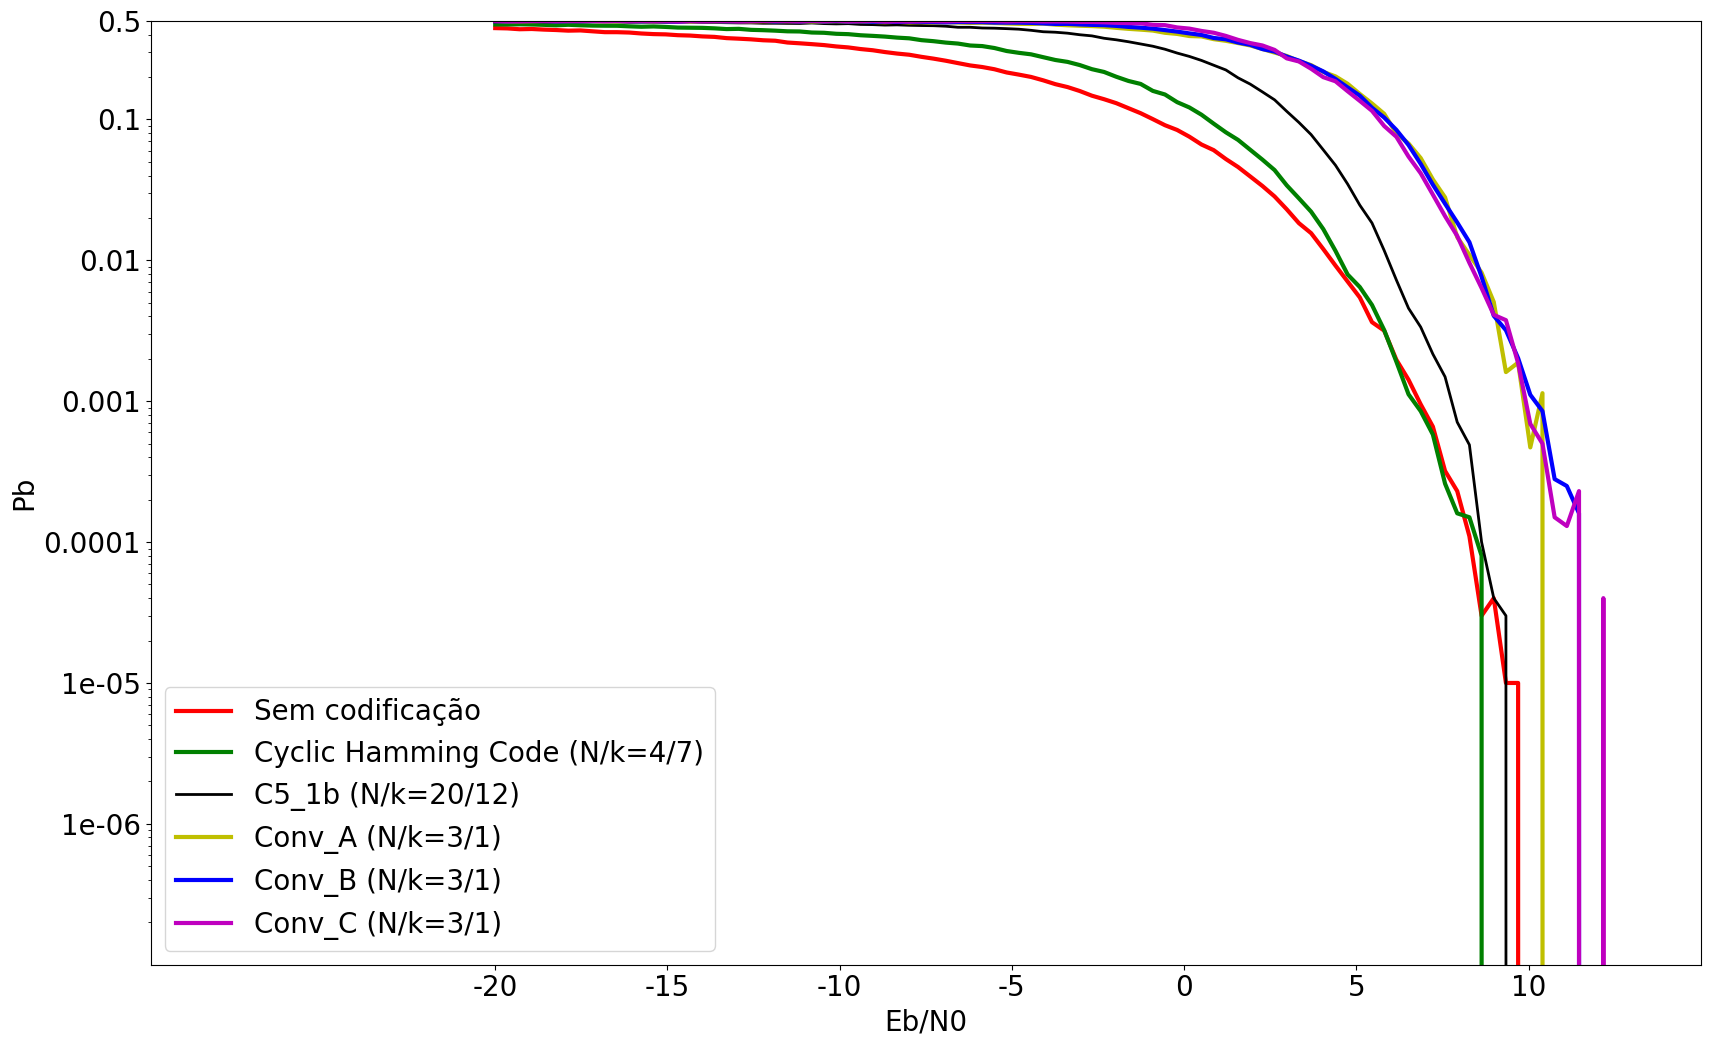

In [16]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"},
    'convolutional_codeA':{'coder':lab3_coder_A, 'color':'y', 'linewidth':3, 'label':"Conv_A (N/k=3/1)"},    
    'convolutional_codeB':{'coder':lab3_coder_B, 'color':'b', 'linewidth':3, 'label':"Conv_B (N/k=3/1)"},    
    'convolutional_codeC':{'coder':lab3_coder_C, 'color':'m', 'linewidth':3, 'label':"Conv_C (N/k=3/1)"}
}


plot_graphs_by_signal_noise_ratio(coders_dict, max_bits_per_cycle=100_000)

# Create the coders

## Lab 1 coders

In [5]:
none_encode_matrix = np.array([[1, 0, 0, 0],  # b1
                               [0, 1, 0, 0],  # b2
                               [0, 0, 1, 0],  # b3
                               [0, 0, 0, 1]]) # b4
                               #b1 b2 b3 b4
    
hamming_encode_matrix = np.array([[1, 0, 0, 0, 1, 1, 1],  # b1
                                  [0, 1, 0, 0, 1, 0, 1],  # b2
                                  [0, 0, 1, 0, 1, 1, 0],  # b3
                                  [0, 0, 0, 1, 0, 1, 1]]) # b4
                                  # b1 b2 b3 b4 p1 p2 p3
    
our_encode_matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],  # b1
                              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],  # b2
                              [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # b3
                              [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # b4
                              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],  # b5
                              [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],  # b6  
                              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],  # b7
                              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]]) # b8
                             # b1 b2 b3 b4 b5 b6 b7 b8 p1 p2 p3 p4 p5 p6

none_coder = gc.GenericParityBitBlockCoder(none_encode_matrix)
hamming_coder = gc.GenericParityBitBlockCoder(hamming_encode_matrix)
our_coder = gc.GenericParityBitBlockCoder(our_encode_matrix)

## Lab 2 coders

In [6]:
#Cyclic codes:

# Hamming-code - N = 7, k = 4
generator_polynomial_hamming_code = [1, 1, 0, 1]
hamming_code_N = 7
cyclic_hamming_coder = cc.CyclicBitBlockCoder(generator_polynomial_hamming_code, hamming_code_N)

##Codes that correct at most 1 bit:
# C1 - N = 12, k = 7
generator_polynomial_c1 = [1, 0, 1, 1, 0, 1]
c1_N = 12
cyclic_c1_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c1, c1_N)

# C2 - N = 14, k = 8
generator_polynomial_c2 = [1, 0, 0, 0, 1, 0, 1]
c2_N = 14
cyclic_c2_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c2, c2_N)

# C3 - N = 15, k = 9
generator_polynomial_c3 = [1, 0, 1, 1, 1, 0, 1]
c3_N = 15
cyclic_c3_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c3, c3_N)

# C4 - N = 18, k = 10
generator_polynomial_c4 = [1, 0, 1, 1, 0, 1, 1, 0, 1]
c4_N = 18
cyclic_c4_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c4, c4_N)

# C5 - N = 20, k = 12
generator_polynomial_c5 = [1, 1, 1, 1, 0, 1, 1, 1, 1]
c5_N = 20
cyclic_c5_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c5, c5_N)

##Codes that correct at most 2 bit:
# C1 - N = 12, k = 7
generator_polynomial_c1 = [1, 0, 1, 1, 0, 1]
c1_N = 12
cyclic_c1_2b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c1, c1_N, 2)

# C2 - N = 14, k = 8
generator_polynomial_c2 = [1, 0, 0, 0, 1, 0, 1]
c2_N = 14
cyclic_c2_2b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c2, c2_N, 2)

# C3 - N = 15, k = 9
generator_polynomial_c3 = [1, 0, 1, 1, 1, 0, 1]
c3_N = 15
cyclic_c3_2b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c3, c3_N, 2)

# C4 - N = 18, k = 10
generator_polynomial_c4 = [1, 0, 1, 1, 0, 1, 1, 0, 1]
c4_N = 18
cyclic_c4_2b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c4, c4_N, 2)

# C5 - N = 20, k = 12
generator_polynomial_c5 = [1, 1, 1, 1, 0, 1, 1, 1, 1]
c5_N = 20
cyclic_c5_2b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c5, c5_N, 2)

## Lab 3 coders

|        | m   | output0 | output1 | output2 |
| ---    | --- | ---     | ---     | ---     |
| Coder A| 3   | 13      | 15      | 17      |
| Coder B| 4   | 25      | 33      | 37      |
| Coder C| 6   | 117     | 127     | 155     |

In [7]:
lab3_A_coder_rules = \
{
    'm_N_previous':(0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1]  # m2
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[2],                  # output0
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2],                  # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] +  m_N_current[1] + m_N_current[2] # output2
    )
}

lab3_B_coder_rules = \
{
    'm_N_previous':(0, 0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1], # m2  
        lambda m_N_previous, input_element: m_N_previous[2]  # m3
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[3],                                  # output0
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2] + m_N_current[3],                 # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[1] + m_N_current[2] + m_N_current[3] # output2
    )
}

lab3_C_coder_rules = \
{
    'm_N_previous':(0, 0, 0, 0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1], # m2  
        lambda m_N_previous, input_element: m_N_previous[2], # m3
        lambda m_N_previous, input_element: m_N_previous[3], # m4  
        lambda m_N_previous, input_element: m_N_previous[4]  # m5
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[2] + m_N_current[3] + m_N_current[4] + m_N_current[5], # output0
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[3] + m_N_current[4] + m_N_current[5], # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2] + m_N_current[3] + m_N_current[5]  # output2
    )
}


lab3_coder_A  = convc.ConvolutionalBitBlockCoder(lab3_A_coder_rules)
lab3_coder_B  = convc.ConvolutionalBitBlockCoder(lab3_B_coder_rules)
lab3_coder_C  = convc.ConvolutionalBitBlockCoder(lab3_C_coder_rules)

# LAB 1

## Hamming Code

Initiate process:
p = 0.5        (T:0.3337 s)
p = 0.31802    (T:0.2943 s)
p = 0.202273   (T:0.2939 s)
p = 0.128653   (T:0.2489 s)
p = 0.0818286  (T:0.2771 s)
p = 0.0520462  (T:0.3047 s)
p = 0.0331034  (T:0.2471 s)
p = 0.0210551  (T:0.2608 s)
p = 0.0133918  (T:0.2737 s)
p = 0.00851774 (T:0.2663 s)
p = 0.00541761 (T:0.2825 s)
p = 0.00344581 (T:0.2558 s)
p = 0.00219167 (T:0.2341 s)
p = 0.00139399 (T:0.2695 s)
p = 0.000886631 (T:0.253 s)
p = 0.000563932 (T:0.2561 s)
p = 0.000358683 (T:0.2186 s)
p = 0.000228136 (T:0.2401 s)
p = 0.000145104 (T:0.2303 s)
p = 9.22916e-05 (T:0.2467 s)
p = 5.8701e-05 (T:0.239 s)
p = 3.73362e-05 (T:0.249 s)
p = 2.37473e-05 (T:0.2485 s)
p = 1.51042e-05 (T:0.2412 s)
p = 9.60685e-06 (T:0.2424 s)
p = 6.11033e-06 (T:0.2281 s)
p = 3.88641e-06 (T:0.2566 s)
p = 2.47191e-06 (T:0.2188 s)
p = 1.57223e-06 (T:0.2262 s)
p = 1e-06      (T:0.2868 s)
Completed in 7.724s


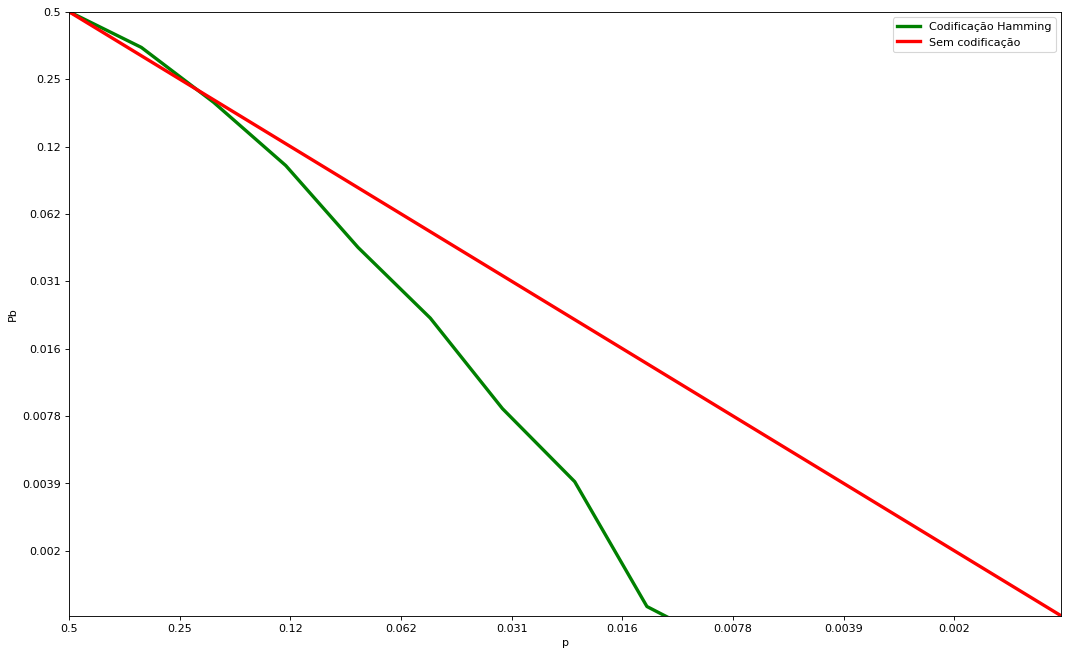

In [5]:
pb = []
p_vector = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
for p in vp:
    ini_cycle = time.time()
    p_vector.append(p)
    number_information_words = 10000
    information_word_length = 4
    # The magic happens here:
    information_words_array = bat.generate_information_words(number_information_words, information_word_length)
    codewords_array = hamming_coder.encode(information_words_array)
    transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
    decoded_words = hamming_coder.decode(transmitted_words)
    pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_vector, pb, label='Codificação Hamming', color='g', linewidth=3)
plt.plot(x, x, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

## Hamming Code With Our Code

Initiate process:
p = 0.5        (T:0.2256 s)
p = 0.31802    (T:0.266 s)
p = 0.202273   (T:0.2152 s)
p = 0.128653   (T:0.2666 s)
p = 0.0818286  (T:0.1814 s)
p = 0.0520462  (T:0.2032 s)
p = 0.0331034  (T:0.2004 s)
p = 0.0210551  (T:0.2039 s)
p = 0.0133918  (T:0.2006 s)
p = 0.00851774 (T:0.1994 s)
p = 0.00541761 (T:0.1851 s)
p = 0.00344581 (T:0.2031 s)
p = 0.00219167 (T:0.2036 s)
p = 0.00139399 (T:0.2031 s)
p = 0.000886631 (T:0.2072 s)
p = 0.000563932 (T:0.1907 s)
p = 0.000358683 (T:0.2047 s)
p = 0.000228136 (T:0.1883 s)
p = 0.000145104 (T:0.2036 s)
p = 9.22916e-05 (T:0.1874 s)
p = 5.8701e-05 (T:0.1893 s)
p = 3.73362e-05 (T:0.2049 s)
p = 2.37473e-05 (T:0.2192 s)
p = 1.51042e-05 (T:0.1953 s)
p = 9.60685e-06 (T:0.1926 s)
p = 6.11033e-06 (T:0.2053 s)
p = 3.88641e-06 (T:0.1931 s)
p = 2.47191e-06 (T:0.1959 s)
p = 1.57223e-06 (T:0.2027 s)
p = 1e-06      (T:0.1959 s)
Completed in 25.32s


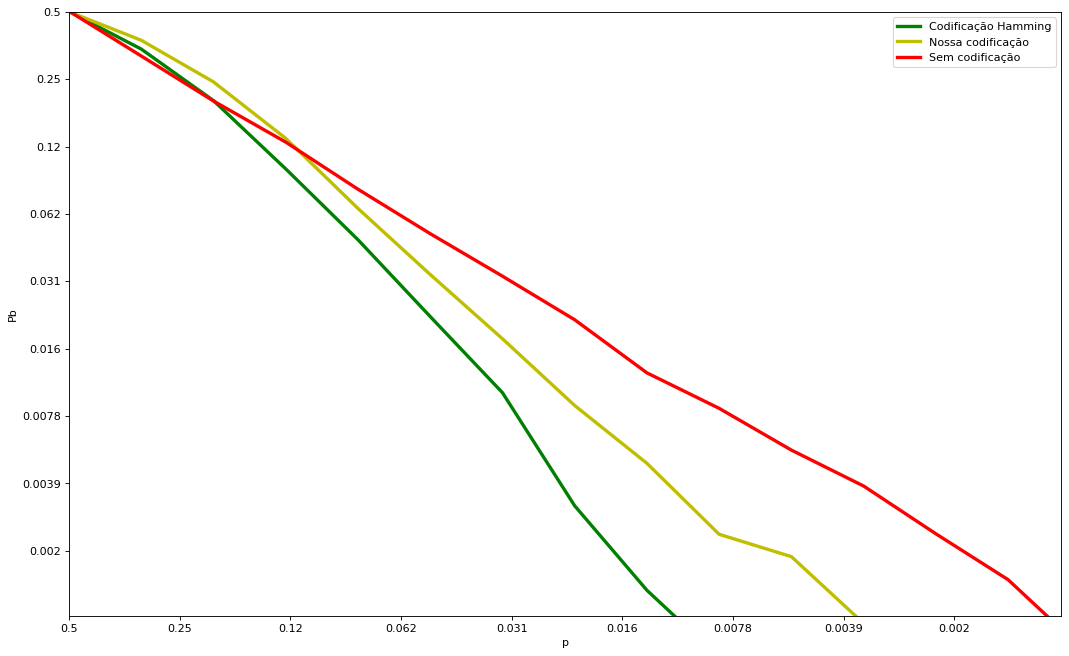

In [5]:
pb_hamming_code_vector = []
pb_our_code_vector     = []
pb_none_code_vector    = []
p_hamming_code_vector = []
p_our_code_vector     = []
p_none_code_vector    = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
hamming_code_pack = (p_hamming_code_vector, pb_hamming_code_vector, hamming_coder)
our_code_pack     = (p_our_code_vector, pb_our_code_vector, our_coder)
none_code_pack    = (p_none_code_vector, pb_none_code_vector, none_coder)
for p in vp:
    for p_vector, pb, coder in [hamming_code_pack, our_code_pack, none_code_pack]:
        ini_cycle = time.time()
        p_vector.append(p)
        number_information_words = 10000
        information_word_length = coder.information_word_length
        # The magic happens here:
        information_words_array = bat.generate_information_words(number_information_words, information_word_length)
        codewords_array = coder.encode(information_words_array)
        transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
        decoded_words = coder.decode(transmitted_words)
        pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_hamming_code_vector, pb_hamming_code_vector, label='Codificação Hamming', color='g', linewidth=3)
ax.plot(p_our_code_vector, pb_our_code_vector, label='Nossa codificação', color='y', linewidth=3)
ax.plot(p_none_code_vector, pb_none_code_vector, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

# LAB 2

Initiate process:
p = 0.5        (T:5.238 s)
p = 0.31802    (T:5.444 s)
p = 0.202273   (T:5.443 s)
p = 0.128653   (T:5.343 s)
p = 0.0818286  (T:5.408 s)
p = 0.0520462  (T:5.395 s)
p = 0.0331034  (T:5.153 s)
p = 0.0210551  (T:5.431 s)
p = 0.0133918  (T:5.267 s)
p = 0.00851774 (T:5.487 s)
p = 0.00541761 (T:5.349 s)
p = 0.00344581 (T:5.287 s)
p = 0.00219167 (T:5.23  s)
p = 0.00139399 (T:5.293 s)
p = 0.000886631 (T:5.298 s)
p = 0.000563932 (T:5.403 s)
p = 0.000358683 (T:5.264 s)
p = 0.000228136 (T:5.287 s)
p = 0.000145104 (T:5.403 s)
p = 9.22916e-05 (T:5.537 s)
p = 5.8701e-05 (T:5.485 s)
p = 3.73362e-05 (T:5.3   s)
p = 2.37473e-05 (T:5.498 s)
p = 1.51042e-05 (T:5.369 s)
p = 9.60685e-06 (T:5.346 s)
p = 6.11033e-06 (T:5.253 s)
p = 3.88641e-06 (T:5.305 s)
p = 2.47191e-06 (T:5.287 s)
p = 1.57223e-06 (T:5.324 s)
p = 1e-06      (T:5.333 s)
Completed in 186.6s


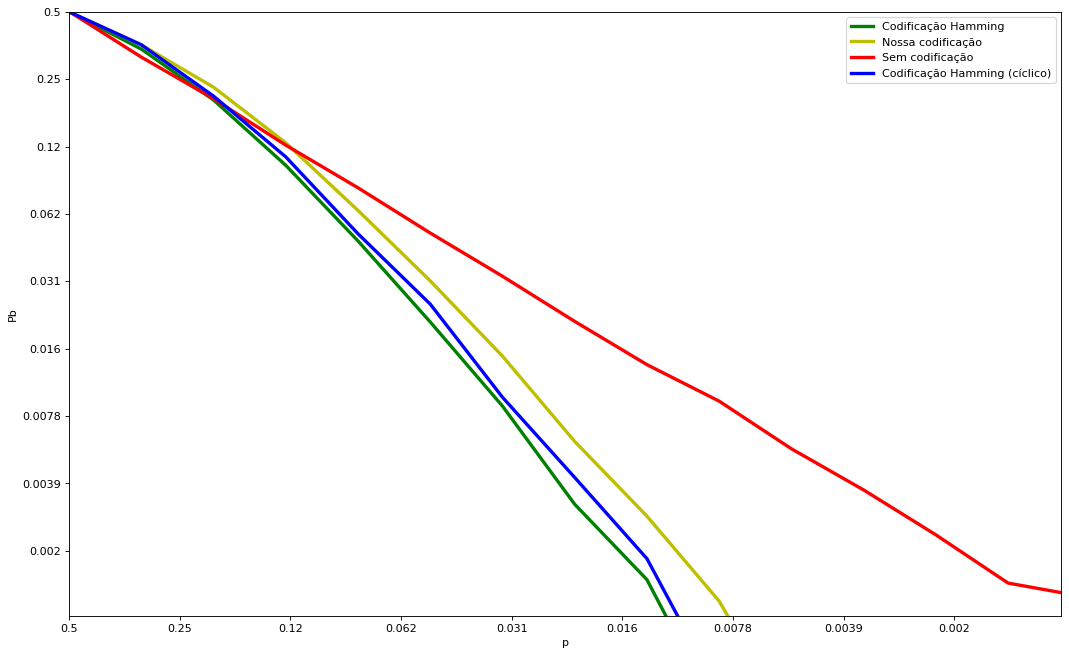

In [6]:
pb_hamming_code_vector = []
pb_our_code_vector     = []
pb_none_code_vector    = []
pb_cyclic_hamming_code_vector = []
p_hamming_code_vector = []
p_our_code_vector     = []
p_none_code_vector    = []
p_cyclic_hamming_code_vector = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
hamming_code_pack = (p_hamming_code_vector, pb_hamming_code_vector, hamming_coder)
our_code_pack     = (p_our_code_vector, pb_our_code_vector, our_coder)
none_code_pack    = (p_none_code_vector, pb_none_code_vector, none_coder)
cyclic_hamming_code_pack = (p_cyclic_hamming_code_vector, pb_cyclic_hamming_code_vector, cyclic_hamming_coder)
for p in vp:
    for p_vector, pb, coder in [hamming_code_pack, our_code_pack, none_code_pack, cyclic_hamming_code_pack]:
        ini_cycle = time.time()
        p_vector.append(p)
        number_information_words = 10000
        information_word_length = coder.information_word_length
        # The magic happens here:
        information_words_array = bat.generate_information_words(number_information_words, information_word_length)
        codewords_array = coder.encode(information_words_array)
        transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
        decoded_words = coder.decode(transmitted_words)
        pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_hamming_code_vector, pb_hamming_code_vector, label='Codificação Hamming', color='g', linewidth=3)
ax.plot(p_our_code_vector, pb_our_code_vector, label='Nossa codificação', color='y', linewidth=3)
ax.plot(p_none_code_vector, pb_none_code_vector, label='Sem codificação', color='r', linewidth=3)
ax.plot(p_cyclic_hamming_code_vector, pb_cyclic_hamming_code_vector, label='Codificação Hamming (cíclico)', color='b', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab2/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

Initiate process:
p = 0.5        (T:68.25 s)
p = 0.31802    (T:68.2  s)
p = 0.202273   (T:67.74 s)
p = 0.128653   (T:68.31 s)
p = 0.0818286  (T:68.42 s)
p = 0.0520462  (T:68.43 s)
p = 0.0331034  (T:67.32 s)
p = 0.0210551  (T:66.9  s)
p = 0.0133918  (T:68.37 s)
p = 0.00851774 (T:67.88 s)
p = 0.00541761 (T:68.52 s)
p = 0.00344581 (T:69.95 s)
p = 0.00219167 (T:65.51 s)
p = 0.00139399 (T:65.85 s)
p = 0.000886631 (T:66.15 s)
p = 0.000563932 (T:67.35 s)
p = 0.000358683 (T:68.76 s)
p = 0.000228136 (T:67.88 s)
p = 0.000145104 (T:74.04 s)
p = 9.22916e-05 (T:66.81 s)
p = 5.8701e-05 (T:68.08 s)
p = 3.73362e-05 (T:67.82 s)
p = 2.37473e-05 (T:67.15 s)
p = 1.51042e-05 (T:64.77 s)
p = 9.60685e-06 (T:65.62 s)
p = 6.11033e-06 (T:65.18 s)
p = 3.88641e-06 (T:72.13 s)
p = 2.47191e-06 (T:83.78 s)
p = 1.57223e-06 (T:84.67 s)
p = 1e-06      (T:78.62 s)
Completed in 2.078e+03s


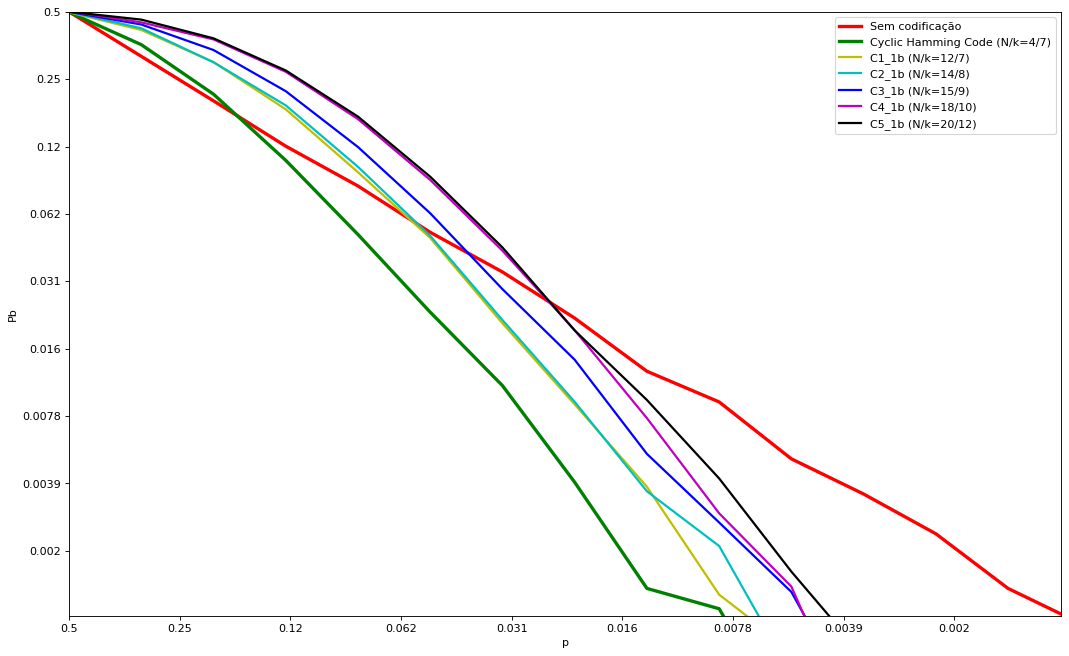

In [32]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    'cyclic_c1':{'coder':cyclic_c1_1b_coder, 'color':'y', 'linewidth':2, 'label':"C1_1b (N/k=12/7)"},
    'cyclic_c2':{'coder':cyclic_c2_1b_coder, 'color':'c', 'linewidth':2, 'label':"C2_1b (N/k=14/8)"},
    'cyclic_c3':{'coder':cyclic_c3_1b_coder, 'color':'b', 'linewidth':2, 'label':"C3_1b (N/k=15/9)"},
    'cyclic_c4':{'coder':cyclic_c4_1b_coder, 'color':'m', 'linewidth':2, 'label':"C4_1b (N/k=18/10)"},
    'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"}
}

plot_graphs(coders_dict, 10000)

Initiate process:
p = 0.5        (T:159.9 s)
p = 0.31802    (T:674.5 s)
p = 0.202273   (T:144.2 s)
p = 0.128653   (T:145.1 s)
p = 0.0818286  (T:146.7 s)
p = 0.0520462  (T:147.8 s)
p = 0.0331034  (T:151.4 s)
p = 0.0210551  (T:148.1 s)
p = 0.0133918  (T:146.8 s)
p = 0.00851774 (T:145.1 s)
p = 0.00541761 (T:145.5 s)
p = 0.00344581 (T:145.9 s)
p = 0.00219167 (T:146.2 s)
p = 0.00139399 (T:144.7 s)
p = 0.000886631 (T:145.4 s)
p = 0.000563932 (T:144.4 s)
p = 0.000358683 (T:144.0 s)
p = 0.000228136 (T:143.4 s)
p = 0.000145104 (T:143.6 s)
p = 9.22916e-05 (T:143.1 s)
p = 5.8701e-05 (T:142.1 s)
p = 3.73362e-05 (T:146.5 s)
p = 2.37473e-05 (T:176.0 s)
p = 1.51042e-05 (T:178.8 s)
p = 9.60685e-06 (T:141.0 s)
p = 6.11033e-06 (T:147.6 s)
p = 3.88641e-06 (T:147.3 s)
p = 2.47191e-06 (T:146.4 s)
p = 1.57223e-06 (T:145.6 s)
p = 1e-06      (T:146.3 s)
Completed in 4.974e+03s


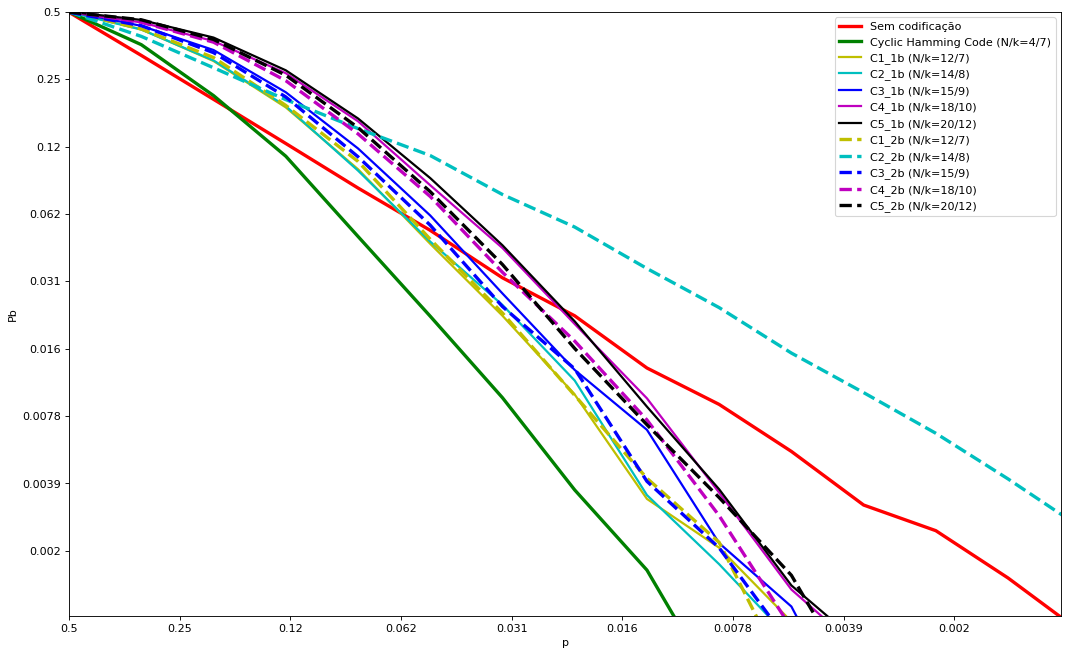

In [33]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    'cyclic_c1':{'coder':cyclic_c1_1b_coder, 'color':'y', 'linewidth':2, 'label':"C1_1b (N/k=12/7)"},
    'cyclic_c2':{'coder':cyclic_c2_1b_coder, 'color':'c', 'linewidth':2, 'label':"C2_1b (N/k=14/8)"},
    'cyclic_c3':{'coder':cyclic_c3_1b_coder, 'color':'b', 'linewidth':2, 'label':"C3_1b (N/k=15/9)"},
    'cyclic_c4':{'coder':cyclic_c4_1b_coder, 'color':'m', 'linewidth':2, 'label':"C4_1b (N/k=18/10)"},
    'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"},
    'cyclic_c1_2b':{'coder':cyclic_c1_2b_coder, 'color':'y', 'linewidth':3, 'linestyle':'--', 'label':"C1_2b (N/k=12/7)"},
    'cyclic_c2_2b':{'coder':cyclic_c2_2b_coder, 'color':'c', 'linewidth':3, 'linestyle':'--', 'label':"C2_2b (N/k=14/8)"},
    'cyclic_c3_2b':{'coder':cyclic_c3_2b_coder, 'color':'b', 'linewidth':3, 'linestyle':'--', 'label':"C3_2b (N/k=15/9)"},
    'cyclic_c4_2b':{'coder':cyclic_c4_2b_coder, 'color':'m', 'linewidth':3, 'linestyle':'--', 'label':"C4_2b (N/k=18/10)"},
    'cyclic_c5_2b':{'coder':cyclic_c5_2b_coder, 'color':'k', 'linewidth':3, 'linestyle':'--', 'label':"C5_2b (N/k=20/12)"}
}

plot_graphs(coders_dict, 10000, fig_name='correct_up_2_bits')

Initiate process:
p = 0.5        (T:3.974 s)
p = 0.31802    (T:3.917 s)
p = 0.202273   (T:3.784 s)
p = 0.128653   (T:4.012 s)
p = 0.0818286  (T:3.915 s)
p = 0.0520462  (T:4.131 s)
p = 0.0331034  (T:3.878 s)
p = 0.0210551  (T:3.88  s)
p = 0.0133918  (T:3.866 s)
p = 0.00851774 (T:3.886 s)
p = 0.00541761 (T:3.906 s)
p = 0.00344581 (T:3.954 s)
p = 0.00219167 (T:3.749 s)
p = 0.00139399 (T:3.82  s)
p = 0.000886631 (T:3.987 s)
p = 0.000563932 (T:3.907 s)
p = 0.000358683 (T:3.914 s)
p = 0.000228136 (T:3.822 s)
p = 0.000145104 (T:3.908 s)
p = 9.22916e-05 (T:3.938 s)
p = 5.8701e-05 (T:3.82  s)
p = 3.73362e-05 (T:3.816 s)
p = 2.37473e-05 (T:4.107 s)
p = 1.51042e-05 (T:4.006 s)
p = 9.60685e-06 (T:4.061 s)
p = 6.11033e-06 (T:3.633 s)
p = 3.88641e-06 (T:3.848 s)
p = 2.47191e-06 (T:3.857 s)
p = 1.57223e-06 (T:3.676 s)
p = 1e-06      (T:4.052 s)
Completed in 117.0s


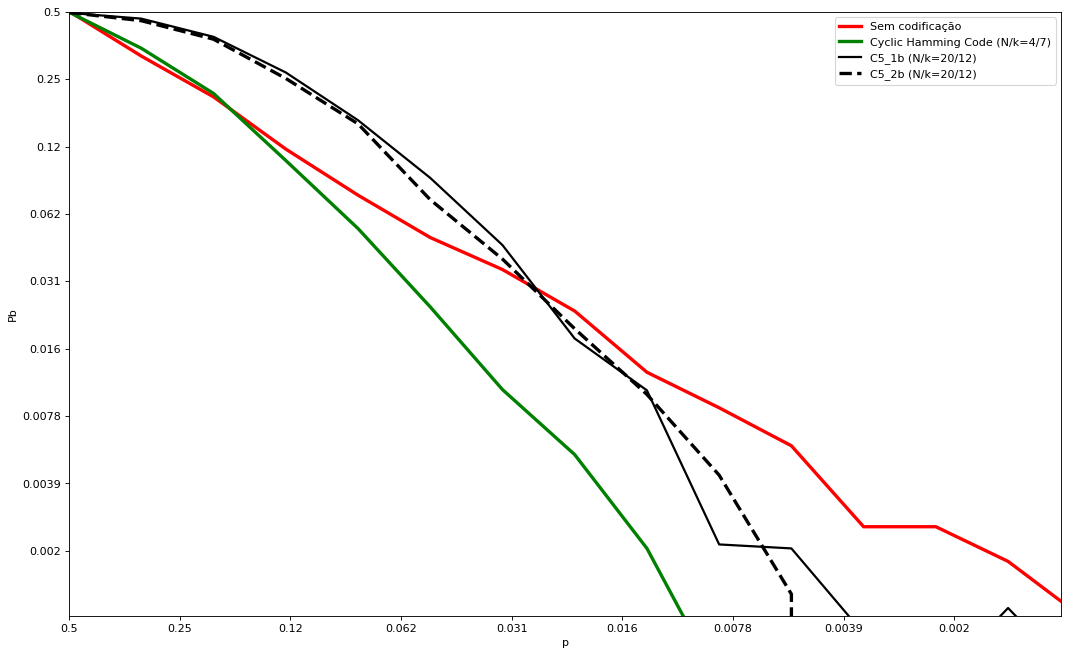

In [31]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"},
    'cyclic_c5_2b':{'coder':cyclic_c5_2b_coder, 'color':'k', 'linewidth':3, 'linestyle':'--', 'label':"C5_2b (N/k=20/12)"}
}

plot_graphs(coders_dict, 1000, debug=False)

# Lab 3

Initiate process:
p = 0.5        (T:18.2  s)
p = 0.31802    (T:17.9  s)
p = 0.202273   (T:17.53 s)
p = 0.128653   (T:17.61 s)
p = 0.0818286  (T:17.12 s)
p = 0.0520462  (T:16.99 s)
p = 0.0331034  (T:16.58 s)
p = 0.0210551  (T:16.96 s)
p = 0.0133918  (T:17.12 s)
p = 0.00851774 (T:15.98 s)
p = 0.00541761 (T:16.62 s)
p = 0.00344581 (T:17.11 s)
p = 0.00219167 (T:16.94 s)
p = 0.00139399 (T:16.02 s)
p = 0.000886631 (T:14.17 s)
p = 0.000563932 (T:13.27 s)
p = 0.000358683 (T:12.47 s)
p = 0.000228136 (T:12.37 s)
p = 0.000145104 (T:12.52 s)
p = 9.22916e-05 (T:12.81 s)
p = 5.8701e-05 (T:13.64 s)
p = 3.73362e-05 (T:13.46 s)
p = 2.37473e-05 (T:12.64 s)
p = 1.51042e-05 (T:12.97 s)
p = 9.60685e-06 (T:12.96 s)
p = 6.11033e-06 (T:12.96 s)
p = 3.88641e-06 (T:13.38 s)
p = 2.47191e-06 (T:13.08 s)
p = 1.57223e-06 (T:12.55 s)
p = 1e-06      (T:12.97 s)
Completed in 446.9s


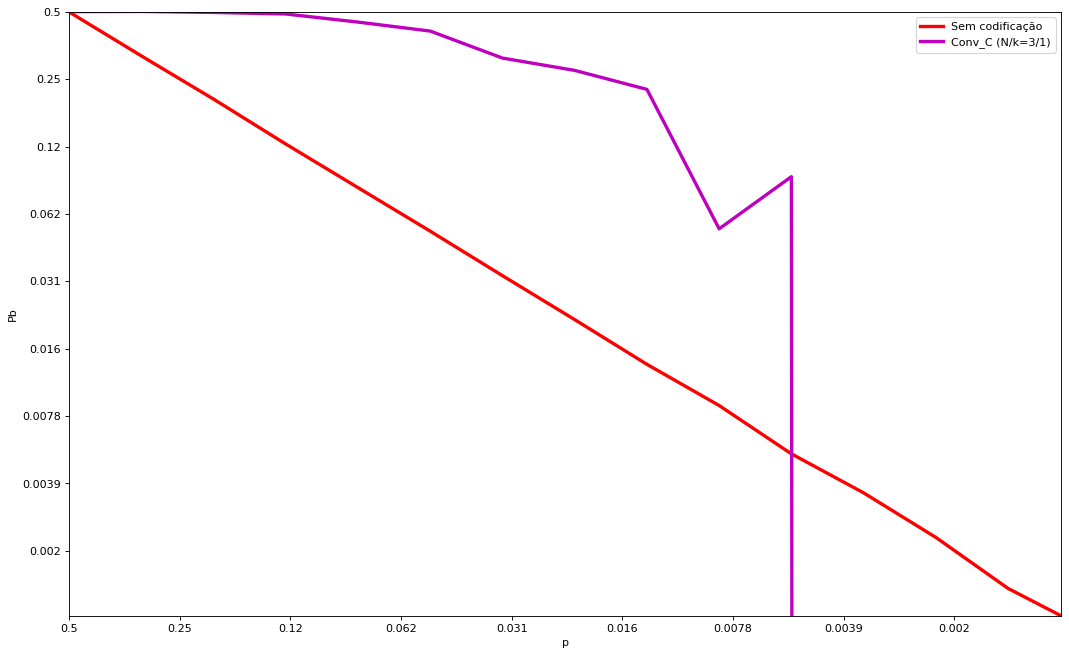

In [281]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    #'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    #'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"},
    #'convolutional_codeA':{'coder':lab3_coder_A, 'color':'y', 'linewidth':3, 'label':"Conv_A (N/k=3/1)"},    
    #'convolutional_codeB':{'coder':lab3_coder_B, 'color':'b', 'linewidth':3, 'label':"Conv_B (N/k=3/1)"},    
    'convolutional_codeC':{'coder':lab3_coder_C, 'color':'m', 'linewidth':3, 'label':"Conv_C (N/k=3/1)"}
}

plot_graphs(coders_dict, 100000, fig_name="LAB3_plot" debug=False)

# Lab 4

In [17]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    #'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    #'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=20/12)"},
    #'convolutional_codeA':{'coder':lab3_coder_A, 'color':'y', 'linewidth':3, 'label':"Conv_A (N/k=3/1)"},    
    #'convolutional_codeB':{'coder':lab3_coder_B, 'color':'b', 'linewidth':3, 'label':"Conv_B (N/k=3/1)"},    
    'convolutional_codeC':{'coder':lab3_coder_C, 'color':'m', 'linewidth':3, 'label':"Conv_C (N/k=3/1)"}
}


plot_graphs_by_signal_noise_ratio(coders_dict)

Initiate process:
Eb_N0 (dB) = -4.5e+01   (T:0.9103 s)
Eb_N0 (dB) = -4.4e+01   (T:0.02699 s)
Eb_N0 (dB) = -4.4e+01   (T:0.02019 s)
Eb_N0 (dB) = -4.3e+01   (T:0.01562 s)
Eb_N0 (dB) = -4.2e+01   (T:0.0312 s)
Eb_N0 (dB) = -4.2e+01   (T:0.01566 s)
Eb_N0 (dB) = -4.1e+01   (T:0.02069 s)
Eb_N0 (dB) = -4e+01     (T:0.04135 s)
Eb_N0 (dB) = -4e+01     (T:0.00723 s)
Eb_N0 (dB) = -3.9e+01   (T:0.0444 s)
Eb_N0 (dB) = -3.8e+01   (T:0.01978 s)
Eb_N0 (dB) = -3.8e+01   (T:0.0317 s)
Eb_N0 (dB) = -3.7e+01   (T:0.02303 s)
Eb_N0 (dB) = -3.6e+01   (T:0.02846 s)
Eb_N0 (dB) = -3.6e+01   (T:0.02594 s)
Eb_N0 (dB) = -3.5e+01   (T:0.03048 s)
Eb_N0 (dB) = -3.4e+01   (T:0.01421 s)
Eb_N0 (dB) = -3.4e+01   (T:0.02434 s)
Eb_N0 (dB) = -3.3e+01   (T:0.02641 s)
Eb_N0 (dB) = -3.3e+01   (T:0.02554 s)
Eb_N0 (dB) = -3.2e+01   (T:0.008973 s)
Eb_N0 (dB) = -3.1e+01   (T:0.03599 s)
Eb_N0 (dB) = -3.1e+01   (T:0.01568 s)
Eb_N0 (dB) = -3e+01     (T:0.03123 s)
Eb_N0 (dB) = -2.9e+01   (T:0.01562 s)
Eb_N0 (dB) = -2.9e+01   (T:0.03125 

C:\Users\artur\AppData\Local\Temp\ipykernel_30280\1884677795.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  num_of_info_words = int((100 / pb[-1]) // information_word_length) + 1
C:\Users\artur\AppData\Local\Temp\ipykernel_30280\1884677795.py:31: RuntimeWarning: invalid value encountered in double_scalars
  num_of_info_words = int((100 / pb[-1]) // information_word_length) + 1


ValueError: cannot convert float NaN to integer

# --------------------------

In [36]:
import importlib
importlib.reload(convc)

<module 'lab3.convolutional_coder' from 'C:\\Users\\artur\\Desktop\\Engineering\\courses_and_labs\\ELE-32_Principios_de_telecomunicacoes\\labs\\lab_ele_32\\lab3\\convolutional_coder.py'>

In [14]:
basic_coder = \
{
    'm_N_previous':(0,),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,
    ),
    'output_rules':(
        lambda m_N_current, input_element: m_N_current[0] + input_element,
        lambda m_N_current, input_element: input_element
    )
}
coder  = convc.ConvolutionalBitBlockCoder(basic_coder)





lab3_A_coder_rules = \
{
    'm_N_previous':(0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1]  # m2
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[2],                  # output0
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2],                  # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] +  m_N_current[1] + m_N_current[2] # output2
    )
}

lab3_B_coder_rules = \
{
    'm_N_previous':(0, 0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1], # m2  
        lambda m_N_previous, input_element: m_N_previous[2]  # m3
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[3],                                  # output0
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2] + m_N_current[3],                 # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[1] + m_N_current[2] + m_N_current[3] # output2
    )
}


lab3_C_coder_rules = \
{
    'm_N_previous':(0, 0, 0, 0, 0, 0),
    'memory_unit_rules':(
        lambda m_N_previous, input_element: input_element,   # m0
        lambda m_N_previous, input_element: m_N_previous[0], # m1   
        lambda m_N_previous, input_element: m_N_previous[1], # m2  
        lambda m_N_previous, input_element: m_N_previous[2], # m3
        lambda m_N_previous, input_element: m_N_previous[3], # m4  
        lambda m_N_previous, input_element: m_N_previous[4]  # m5
    ),
    'output_rules':(
        lambda m_N_current, input_element: input_element + m_N_current[2] + m_N_current[3] + m_N_current[4] + m_N_current[5], # output0
        lambda m_N_current, input_element: input_element + m_N_current[1] + m_N_current[3] + m_N_current[4] + m_N_current[5], # output1
        lambda m_N_current, input_element: input_element + m_N_current[0] + m_N_current[2] + m_N_current[3] + m_N_current[5]  # output2
    )
}


lab3_coder_A  = convc.ConvolutionalBitBlockCoder(lab3_A_coder_rules)
lab3_coder_B  = convc.ConvolutionalBitBlockCoder(lab3_B_coder_rules)
lab3_coder_C  = convc.ConvolutionalBitBlockCoder(lab3_C_coder_rules)

In [15]:
original = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,0,0,0,1,0,1,1,1,1,0,0,1], dtype=np.ubyte)
#original = np.array([0, 1, 0, 1], dtype=np.ubyte)

In [16]:
coded_by_generic = coder.encode(original)
decoded_by_generic = coder.decode(coded_by_generic)
all(decoded_by_generic == original)

[(0,), (1,)]
[(0,), (1,)]
[(0,), (1,)]


True

In [25]:
coded_by_A = lab3_coder_A.encode(original)
decoded_by_A = lab3_coder_A.decode(coded_by_A)
all(decoded_by_A == original)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


True

In [18]:
coded_by_B = lab3_coder_B.encode(original)
decoded_by_B = lab3_coder_B.decode(coded_by_B)
all(decoded_by_B == original)

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]


True

In [19]:
coded_by_C = lab3_coder_C.encode(original)
decoded_by_C = lab3_coder_C.decode(coded_by_C)
all(decoded_by_C == original)

[(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 0, 1), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1), (0, 1, 0, 0, 0, 0), (0, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0), (0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1), (0, 1, 1, 0, 1, 0), (0, 1, 1, 0, 1, 1), (0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1), (1, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0), (1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 1),

True